# Eternals Movie Sentiment Analysis

This project contains a simple sentiment analysis of the Marvel's newly released eternals movie.
The text data is obtained from the Twitter platform, where 500 tweets from the audience are selected randomly via Twitter API. Using the NLTK's "Sentiment.Vader" library, we are going to score the tweets based on the reviews given. Thus, we can analyze how well the movie is faring across the globe.

## Importing necessary libraries for the project

In [1]:
import tweepy as tw
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk.sentiment.vader as vd
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
from nltk import trigrams
import pandas as pd
import matplotlib.pyplot as plt
import re

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


## Passing the API keys from the twitter developer platform, of your profile.

In this step we are going to pass the API keys to authenticate any request that is accessing the Twitter API.

In [2]:
my_api_key = ""
my_api_secret = ""

auth = tw.OAuthHandler(my_api_key, my_api_secret)
api = tw.API(auth, wait_on_rate_limit=True)

Next we are going to enter the keywords with which you want to obtain the data. We are going to filter all the retweets that were made with the specified keywords.

In [3]:
search_query = "#eternals #marvel -filter:retweets"

Now let us fetch the data using Twitter API calls and the search query we have specified. We are going to randomly fetch 500 tweets and analyze them and store them as a list.

In [4]:
tweets = tw.Cursor(api.search,
              q=search_query,
              lang="en",
              since="2021-11-05").items(500)

tweets_copy = []
for tweet in tweets:
    tweets_copy.append(tweet)
    
print("Total Tweets fetched:", len(tweets_copy))

Total Tweets fetched: 500


## Storing the data as a dataframe

In this step we are going to store the obtained results via dataframe. This will allow us to analyze the data without much of an hassle.

In [5]:
tweets_df = pd.DataFrame()

for tweet in tweets_copy:
    hashtags = []
    try:
        for hashtag in tweet.entities["hashtags"]:
            hashtags.append(hashtag["text"])
        text = api.get_status(id=tweet.id, tweet_mode='extended').full_text
    except:
        pass
    tweets_df = tweets_df.append(pd.DataFrame({'user_name': tweet.user.name, 
                                               'user_location': tweet.user.location,
                                               'user_description': tweet.user.description,
                                               'user_verified': tweet.user.verified,
                                               'date': tweet.created_at,
                                               'text': text, 
                                               'hashtags': [hashtags if hashtags else None],
                                               'source': tweet.source}))
    tweets_df = tweets_df.reset_index(drop=True)

tweets_df.head()

,user_name,user_location,user_description,user_verified,date,text,hashtags,source
0,Ec⭕️mi H⭕️mies,Veveverse,Just a poor orphan from the Stacks! Welcome my...,False,2021-11-06 17:15:11,@veve_official team really is big 🧠! Releasing...,None,Twitter for iPhone
1,Brick Fanatics,United Kingdom,Brick Fanatics is a website dedicated to build...,False,2021-11-06 17:13:08,Zavvi is hosting an assortment of LEGO Marvel ...,None,Twitter Web App
2,Best of marvel,Avengers Tower,Welcome to the multiverse. #marvel #mcu #inthe...,False,2021-11-06 17:11:56,WE ARE THE ETERNALS !!! #sersi #ikaris #phasto...,"[sersi, ikaris, phastos, thena, EternalsGilgam...",Twitter for iPhone
3,Animated Times,United States,"Your one-stop destination for all Marvel, DC, ...",False,2021-11-06 17:06:59,Marvel Comics Actually Changed The Eternals To...,"[comics, Eternals, Marvel, movies]",AT Auto Tweet
4,Selenasheartbeat ELMIR 💃🏻 ♥️🔥 🐍🎷,"Uppsala, Sverige",24 & Boy selenator for 18 years I’ll get to me...,False,2021-11-06 17:04:29,Some new additions from the #heroescomicon tod...,"[heroescomicon, Eternals, MCU, whatif, starwar...",Twitter for iPhone


Displaying the first five rows of the text columns of the dataframe. This will allow us to speculate the type of tweets that are present in the data.

In [6]:
tweets_df['text'].head()

0    @veve_official team really is big 🧠! Releasing...
1    Zavvi is hosting an assortment of LEGO Marvel ...
2    WE ARE THE ETERNALS !!! #sersi #ikaris #phasto...
3    Marvel Comics Actually Changed The Eternals To...
4    Some new additions from the #heroescomicon tod...
Name: text, dtype: object

In [7]:
tweets_df.drop_duplicates(subset='text',inplace=True)
tweets_df['text'].head()

0    @veve_official team really is big 🧠! Releasing...
1    Zavvi is hosting an assortment of LEGO Marvel ...
2    WE ARE THE ETERNALS !!! #sersi #ikaris #phasto...
3    Marvel Comics Actually Changed The Eternals To...
4    Some new additions from the #heroescomicon tod...
Name: text, dtype: object

# Cleaning and Preparation of the Data

Cleaning the data is one of the most important steps in analysis of the data. The removal of any noise or unwanted data can help us to truly get the insights from the data.

Some of the steps involved in cleaning the Text datasets are as follows:

(1) Converting the text to lower case

(2) Removal of Stop words

(3) Tokenization

(4) Lemmatization

## Removal of Stop Words

In the next step, we are going to remove the stopwords from the dataset. Stop words are the most common words in a language. These words do not add any significance to the data, thus we are going to remove these and clean the data.

NLTK provides us the functionality to perform this step with its inbuilt stopwords functionality, which contains the list of all the common words and removes the same from the dataset if those words exist. We are also going to provide a custom stop words and pass it via list. These are some of the words which was found during the trial runs of the data, which acted as a noise to our problem statement.


In [8]:
nltk.download('stopwords')

additional  = ['rt','rts','retweet', 'interviews', 'eternalsth', 'marvel', 'mcu', 'marvelstudios', 'marveluniverse', 'marveleternals', 'imax', 'gallery', 'trailer', 'marvelcomics', 'marvelcinematicuniverse', '3d', 'studio', 'telegram', 'comic', 'comics', 'comicbook', 'comicbookmovie', 'disney', 'disneystudio', 'disneyplus', 'dreamtoys21', 'bossbaby2', 'ghostbustersafterlife', 'kidzcoolit', 'playstation5', 'peppapig', 'dccomics', 'dogtanian', 'dune', 'nintendo', 'sooryavanshi', 'annaatthe', 'theeternals', 'fri', 'saturday', 'diwali', 'eternalsreview', 'movies', 'film']
stop_words = set().union(stopwords.words('english'), additional)
stop_words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'3d',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'annaatthe',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'bossbaby2',
 'both',
 'but',
 'by',
 'can',
 'comic',
 'comicbook',
 'comicbookmovie',
 'comics',
 'couldn',
 "couldn't",
 'd',
 'dccomics',
 'did',
 'didn',
 "didn't",
 'disney',
 'disneyplus',
 'disneystudio',
 'diwali',
 'do',
 'does',
 'doesn',
 "doesn't",
 'dogtanian',
 'doing',
 'don',
 "don't",
 'down',
 'dreamtoys21',
 'dune',
 'during',
 'each',
 'eternalsreview',
 'eternalsth',
 'few',
 'film',
 'for',
 'fri',
 'from',
 'further',
 'gallery',
 'ghostbustersafterlife',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'imax',
 'in',
 'interviews',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'it

## Converting the text data to lower case and converting unwanted characters to empty string.

Converting the text to lower case: This step is performed to normalize the text data. By doing this we create a level playing field, where each word is given equal importance.

In [9]:
tweets_df['processed_text'] = tweets_df['text'].str.lower().str.replace('(@[a-z0-9]+)\w+',' ').str.replace('(http\S+)', ' ').str.replace('([^0-9a-z \t])',' ').str.replace(' +',' ').apply(lambda x: [i for i in x.split(' ') if not i in stop_words])

In [10]:
tweets_df['processed_text'].head()

0    [, team, really, big, releasing, 100k, mint, d...
1    [zavvi, hosting, assortment, lego, savings, ri...
2    [eternals, sersi, ikaris, phastos, thena, eter...
3    [actually, changed, eternals, match, counterpa...
4    [new, additions, heroescomicon, today, eternal...
Name: processed_text, dtype: object

## Lemmatization

Lemmatization is a process of converting a word to its base form.

The reason we perform Lemmatization is that, lemmatization considers the context and converts the word to its meaningful base form. Thus, reducing the chances of error in interpretation of the data.

For this problem statement we are going to perform Lemmatization using the WordNetLemmatizer.

In [11]:
lm = WordNetLemmatizer()
nltk.download('wordnet')

tweets_df['lemmatized'] = tweets_df['processed_text'].apply(lambda x: [lm.lemmatize(i) for i in x if i != ''])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
tweets_df['lemmatized'].head()

0    [team, really, big, releasing, 100k, mint, dro...
1    [zavvi, hosting, assortment, lego, saving, rig...
2    [eternals, sersi, ikaris, phastos, thena, eter...
3    [actually, changed, eternals, match, counterpa...
4    [new, addition, heroescomicon, today, eternals...
Name: lemmatized, dtype: object

## Sentiment Analysis

Now that we have cleaned our data, it is time to perform the main part of our analysis, i.e., calculate the ratings of every tweet based on the intensity of the words used.

For this we are going to use NLTKs SentimentIntensityAnalyzer function. This will provide the ratings of each tweet based on the words used. The values can range from negative to positve. Negative values signifies that the tweet posted was in a negative manner, similarly, Positive values indicate that the tweet highlights the use of positive and praising words.

In [13]:
nltk.download('vader_lexicon')

sia = vd.SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Let us now pass the processed dataset and get the scores for each tweet.

In [14]:
nltk.download('punkt')

tweets_df['sentiment_score'] = tweets_df['processed_text'].apply(lambda x: sum([sia.polarity_scores(i)['compound'] for i in word_tokenize( ' '.join(x))]))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In this we can see mixed reaction from the audience. While some of them have praised the movie, most of them have stayed neutral or did not like the movie.

Let us dig more into this and find out.

In [15]:
tweets_df[['processed_text', 'sentiment_score']].head(10)

,processed_text,sentiment_score
0,"[, team, really, big, releasing, 100k, mint, d...",0.3182
1,"[zavvi, hosting, assortment, lego, savings, ri...",0.0000
2,"[eternals, sersi, ikaris, phastos, thena, eter...",0.0000
3,"[actually, changed, eternals, match, counterpa...",0.0000
4,"[new, additions, heroescomicon, today, eternal...",0.0000
5,"[like, teaser, need, reactions, bohemianbulldo...",0.1112
6,"[eternals, one, popular, article, english, wik...",0.4215
7,"[saw, eternals, yesterday, beautiful, complex,...",1.6956
8,"[ok, think, veve, ecomi, omi, nft, nftfam, ete...",0.2960
9,"[successful, live, action, adaptations, superh...",1.1433


With this graph, we can see that most of the ratings are centered around the neutral rating. While the count of the postive ratings are higher, there are few negative ratings as well and also the count of the higher positive ratings are decreasing. This is expected, since all the audience have different taste in movies or did not reach upto their expectations. Either ways it is important to know the reason behind this and find a suitable fix, thus improving the ratings from the audience in the future installments.

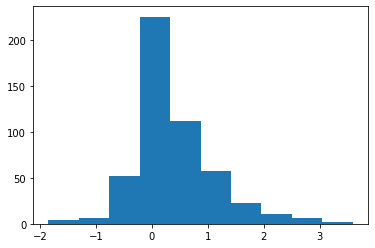

In [16]:
plt.hist(tweets_df['sentiment_score'])
plt.show()

The value counts of each rating signals the same. Out of 500 tweets which were fetched, over 300 of them had a neutral rating and over a 100 tweets with a rating of 1. Ideally more positive ratings is expected, although it may vary with more sample size of the data.

In [17]:
tweets_df['sentiment_score'].apply(lambda x: round(x,)).value_counts()

 0    314
 1    125
 2     28
-1     21
 3      7
-2      2
 4      1
Name: sentiment_score, dtype: int64

## Word Cloud

Word cloud allows us to observe the frequency of key words used in the tweet. More a word is repeated, more larger the word is highlighted. We can analyze the emotions behind the tweets and understand the overall feeling of the audience for this problem statement.

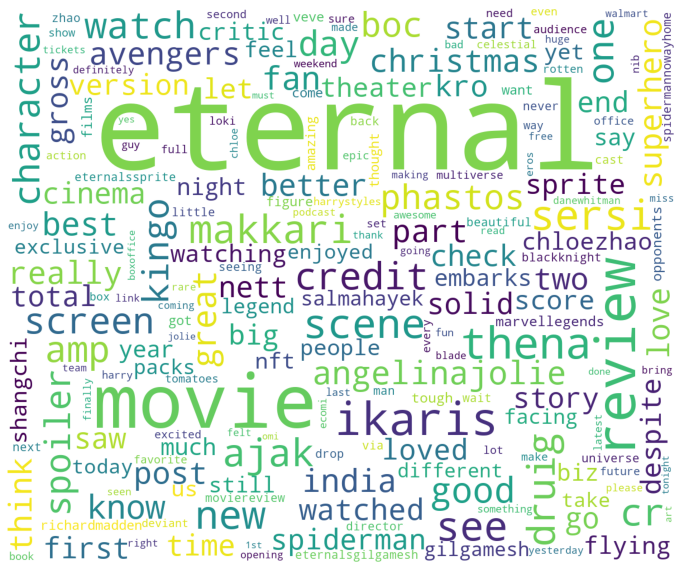

In [18]:
bigstring = tweets_df['processed_text'].apply(lambda x: ' '.join(x)).str.cat(sep=' ')
plt.figure(figsize=(12,12))
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          collocations=False,
                          width=1200,
                          height=1000
                         ).generate(bigstring)
plt.axis('off')
plt.imshow(wordcloud)

We can check the number of times with which each words have been repeated in the data, numerically. While the word eternals being the most frequently word used makes sense since that is the movie which is getting reviewed.

In [19]:
words = tweets_df['processed_text'].dropna().apply(lambda y: pd.value_counts(re.findall('([\s]\w+[\s])',' '.join(y)))).sum(axis=0).to_frame().reset_index().sort_values(by=0,ascending=False)

words.columns = ['word','occurences']
words.head(10)

,word,occurences
10,eternals,359.0
236,movie,70.0
296,review,26.0
186,ikaris,24.0
155,see,24.0
21,sersi,19.0
162,thena,17.0
23,druig,17.0
19,phastos,17.0
14,new,17.0
